# 문제 정의

제공 받은 Dataset은 age, anaemia, high blood pressure, diabetes 등의 병원데이터라고 추측되는 데이터이고 DEATH_EVENT는 해당 환자의 사후관리 기간 중 사망한 경우를 나타냅니다.

라이브러리 임포트

In [1]:
# Libraies for reading and handling the data
import numpy as np
import pandas as pd
import re

# Libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Libraries for data preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin

# Libraries for creating ML model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Library for Analysing the ML model
from sklearn import metrics

데이터 준비하기

In [2]:
# csv 파일을 데이터프레임으로 변환
df = pd.read_csv('data.csv', header=None)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       300 non-null    object
 1   1       300 non-null    object
 2   2       300 non-null    object
 3   3       300 non-null    object
 4   4       300 non-null    object
 5   5       300 non-null    object
 6   6       300 non-null    object
 7   7       300 non-null    object
 8   8       300 non-null    object
 9   9       300 non-null    object
 10  10      300 non-null    object
 11  11      300 non-null    object
 12  12      300 non-null    object
dtypes: object(13)
memory usage: 30.6+ KB


In [4]:
# 열 이름 지정
df.columns = ['age','anamia','creatinine_phosphokinase','diabetes','ejection_fraction',
              'high_blood_pressure','platelets','serum_creatinine','serum_sodium',
              'sex','smoking','time','DEATH_EVENT']

In [5]:
df.head()

,age,anamia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
1,75,0,582,0,20,1,265000,1.9,130,1,0,4,1
2,55,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
3,65,0,146,0,20,0,162000,1.3,129,1,1,7,1
4,50,1,111,0,20,0,210000,1.9,137,1,0,7,1


데이터 탐색 및 데이터 전처리

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   age                       300 non-null    object
 1   anamia                    300 non-null    object
 2   creatinine_phosphokinase  300 non-null    object
 3   diabetes                  300 non-null    object
 4   ejection_fraction         300 non-null    object
 5   high_blood_pressure       300 non-null    object
 6   platelets                 300 non-null    object
 7   serum_creatinine          300 non-null    object
 8   serum_sodium              300 non-null    object
 9   sex                       300 non-null    object
 10  smoking                   300 non-null    object
 11  time                      300 non-null    object
 12  DEATH_EVENT               300 non-null    object
dtypes: object(13)
memory usage: 30.6+ KB


In [7]:
# column 추가로 중복된 첫 번째행 삭제
df= df.drop(0,0)
df.head()

,age,anamia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
1,75,0,582,0,20,1,265000,1.9,130,1,0,4,1
2,55,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
3,65,0,146,0,20,0,162000,1.3,129,1,1,7,1
4,50,1,111,0,20,0,210000,1.9,137,1,0,7,1
5,65,1,160,1,20,0,327000,2.7,116,0,0,8,1


In [8]:
# age 열의 자료형 변경 (문자열 -> 숫자)
df['age'].unique()

array(['75', '55', '65', '50', '90', '60', '80', '62', '45', '49', '82',
       '87', '70', '48', '68', '53', '95', '58', '94', '85', '69', '72',
       '51', '57', '42', '41', '67', '79', '59', '44', '63', '86', '66',
       '43', '46', '61', '81', '52', '64', '40', '60.667', '73', '77',
       '78', '54', '47', '56'], dtype=object)

In [9]:
# 60.667를 np.nan으로 변경
df['age'].replace('60.667',np.nan,inplace=True)
df.info

<bound method DataFrame.info of     age anamia creatinine_phosphokinase diabetes  ... sex smoking time DEATH_EVENT
1    75      0                      582        0  ...   1       0    4           1
2    55      0                     7861        0  ...   1       0    6           1
3    65      0                      146        0  ...   1       1    7           1
4    50      1                      111        0  ...   1       0    7           1
5    65      1                      160        1  ...   0       0    8           1
..   ..    ...                      ...      ...  ...  ..     ...  ...         ...
295  62      0                       61        1  ...   1       1  270           0
296  55      0                     1820        0  ...   0       0  271           0
297  45      0                     2060        1  ...   0       0  278           0
298  45      0                     2413        0  ...   1       1  280           0
299  50      0                      196        0  ...  

In [10]:
# nan 확인
df['age'].unique()

array(['75', '55', '65', '50', '90', '60', '80', '62', '45', '49', '82',
       '87', '70', '48', '68', '53', '95', '58', '94', '85', '69', '72',
       '51', '57', '42', '41', '67', '79', '59', '44', '63', '86', '66',
       '43', '46', '61', '81', '52', '64', '40', nan, '73', '77', '78',
       '54', '47', '56'], dtype=object)

In [11]:
# 데이터안 nan값 60으로 변경
df=df.fillna(60)

In [12]:
# 변경 사항 확인
df['age'].unique()

array(['75', '55', '65', '50', '90', '60', '80', '62', '45', '49', '82',
       '87', '70', '48', '68', '53', '95', '58', '94', '85', '69', '72',
       '51', '57', '42', '41', '67', '79', '59', '44', '63', '86', '66',
       '43', '46', '61', '81', '52', '64', '40', 60, '73', '77', '78',
       '54', '47', '56'], dtype=object)

In [13]:
# 열들의 자료형 변경 (문자열 -> 숫자)
df['age']=df['age'].astype('int')

df['creatinine_phosphokinase']=df['creatinine_phosphokinase'].astype('int')

df['ejection_fraction']=df['ejection_fraction'].astype('int')

df['platelets']=df['platelets'].astype('float')

df['serum_creatinine']=df['serum_creatinine'].astype('float')

df['serum_sodium']=df['serum_sodium'].astype('int')

df['time']=df['time'].astype('int')

df['DEATH_EVENT']=df['DEATH_EVENT'].astype('int')

In [14]:
# 숫자 형태의 변수 -> 카테고리 형태로 변경
categorical_var=['anamia','diabetes','high_blood_pressure','sex','smoking']
df[categorical_var] = df[categorical_var].astype('category')

형변환 완료한 데이터 형식

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 299 entries, 1 to 299
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   age                       299 non-null    int64   
 1   anamia                    299 non-null    category
 2   creatinine_phosphokinase  299 non-null    int64   
 3   diabetes                  299 non-null    category
 4   ejection_fraction         299 non-null    int64   
 5   high_blood_pressure       299 non-null    category
 6   platelets                 299 non-null    float64 
 7   serum_creatinine          299 non-null    float64 
 8   serum_sodium              299 non-null    int64   
 9   sex                       299 non-null    category
 10  smoking                   299 non-null    category
 11  time                      299 non-null    int64   
 12  DEATH_EVENT               299 non-null    int64   
dtypes: category(5), float64(2), int64(6)
memory usage:

In [16]:
df.head()

,age,anamia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
1,75,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
2,55,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
3,65,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
4,50,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
5,65,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


데이터 시각화

In [17]:
# 사망 여부 확인 (0:사망, 1: 생존)
df['DEATH_EVENT'].value_counts()

0    203
1     96
Name: DEATH_EVENT, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


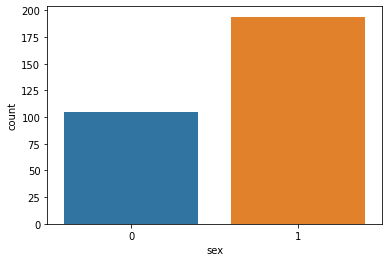

In [18]:
# 성별에 따른 환자의 수 (0: 여성, 1: 남성)
sns.countplot(df.sex)

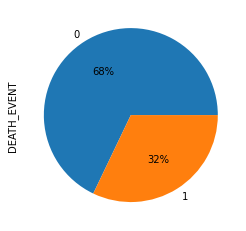

In [19]:
# 사망자-생존자 환자 비율 (0: 사망, 1: 생존)
df.DEATH_EVENT.value_counts().plot.pie(autopct = '%1.f%%')

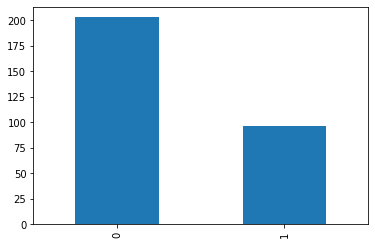

In [20]:
# 바 그래프 시각화
df.DEATH_EVENT.value_counts().plot.bar()

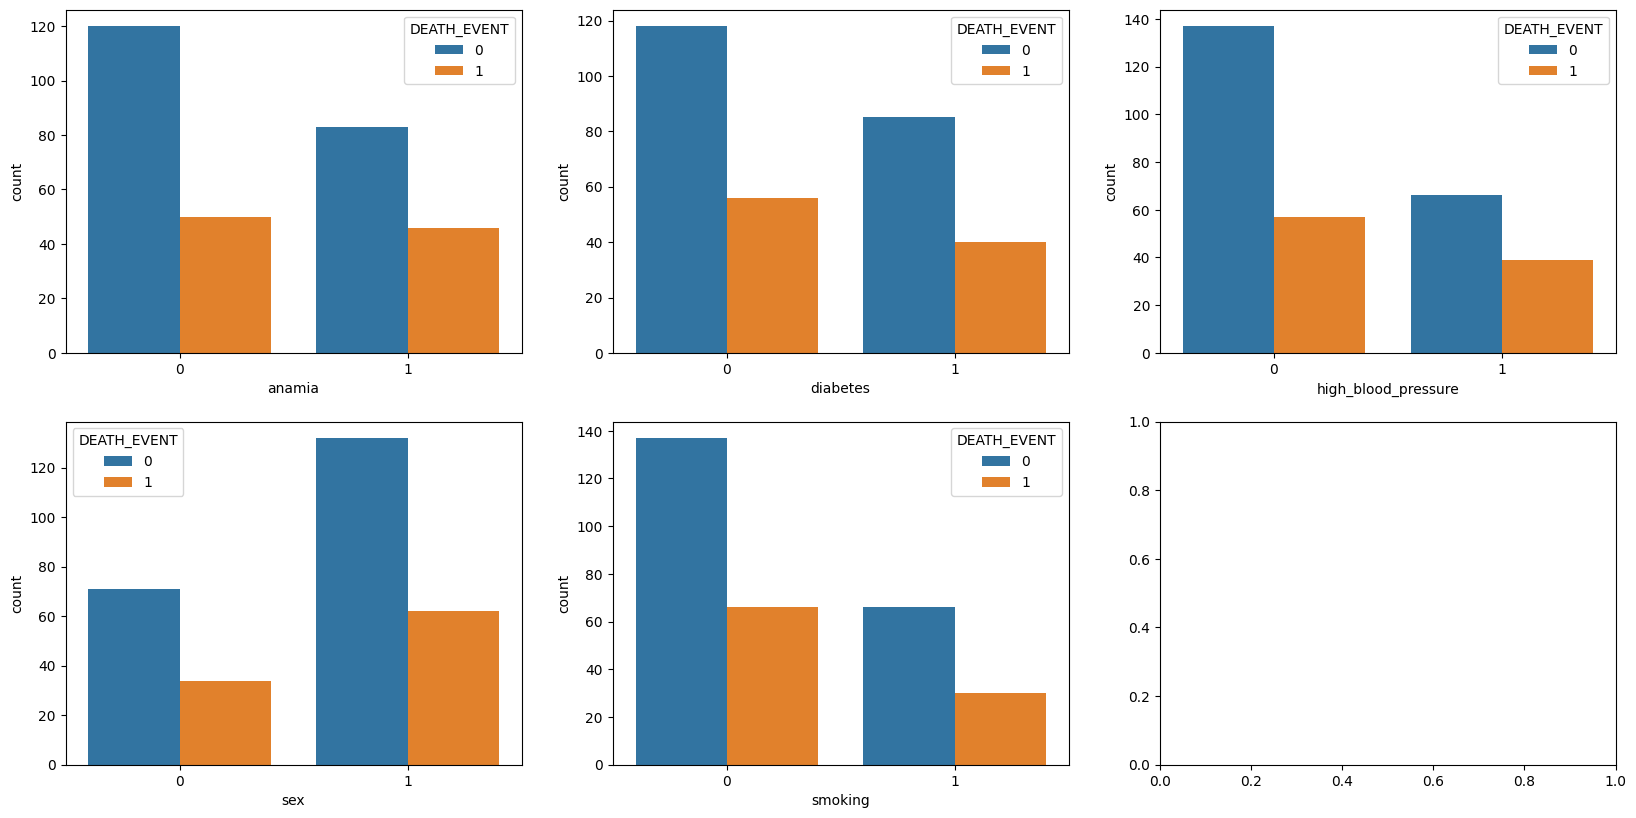

In [21]:
# 범주형으로 되어있는 컬럼에 대한 사망, 생존의 관계 확인
fig, ax = plt.subplots(2,3,figsize=(20,10), dpi=100) # 2행 3열

for axis, cat_var in zip(ax.ravel(), categorical_var) :
  sns.countplot(x=cat_var, data=df, hue='DEATH_EVENT', ax=axis)

In [22]:
# 수치형으로 되어 있는 컬럼 -> 이상치
numeric_var = [i for i in df.columns if i not in categorical_var][:-1]

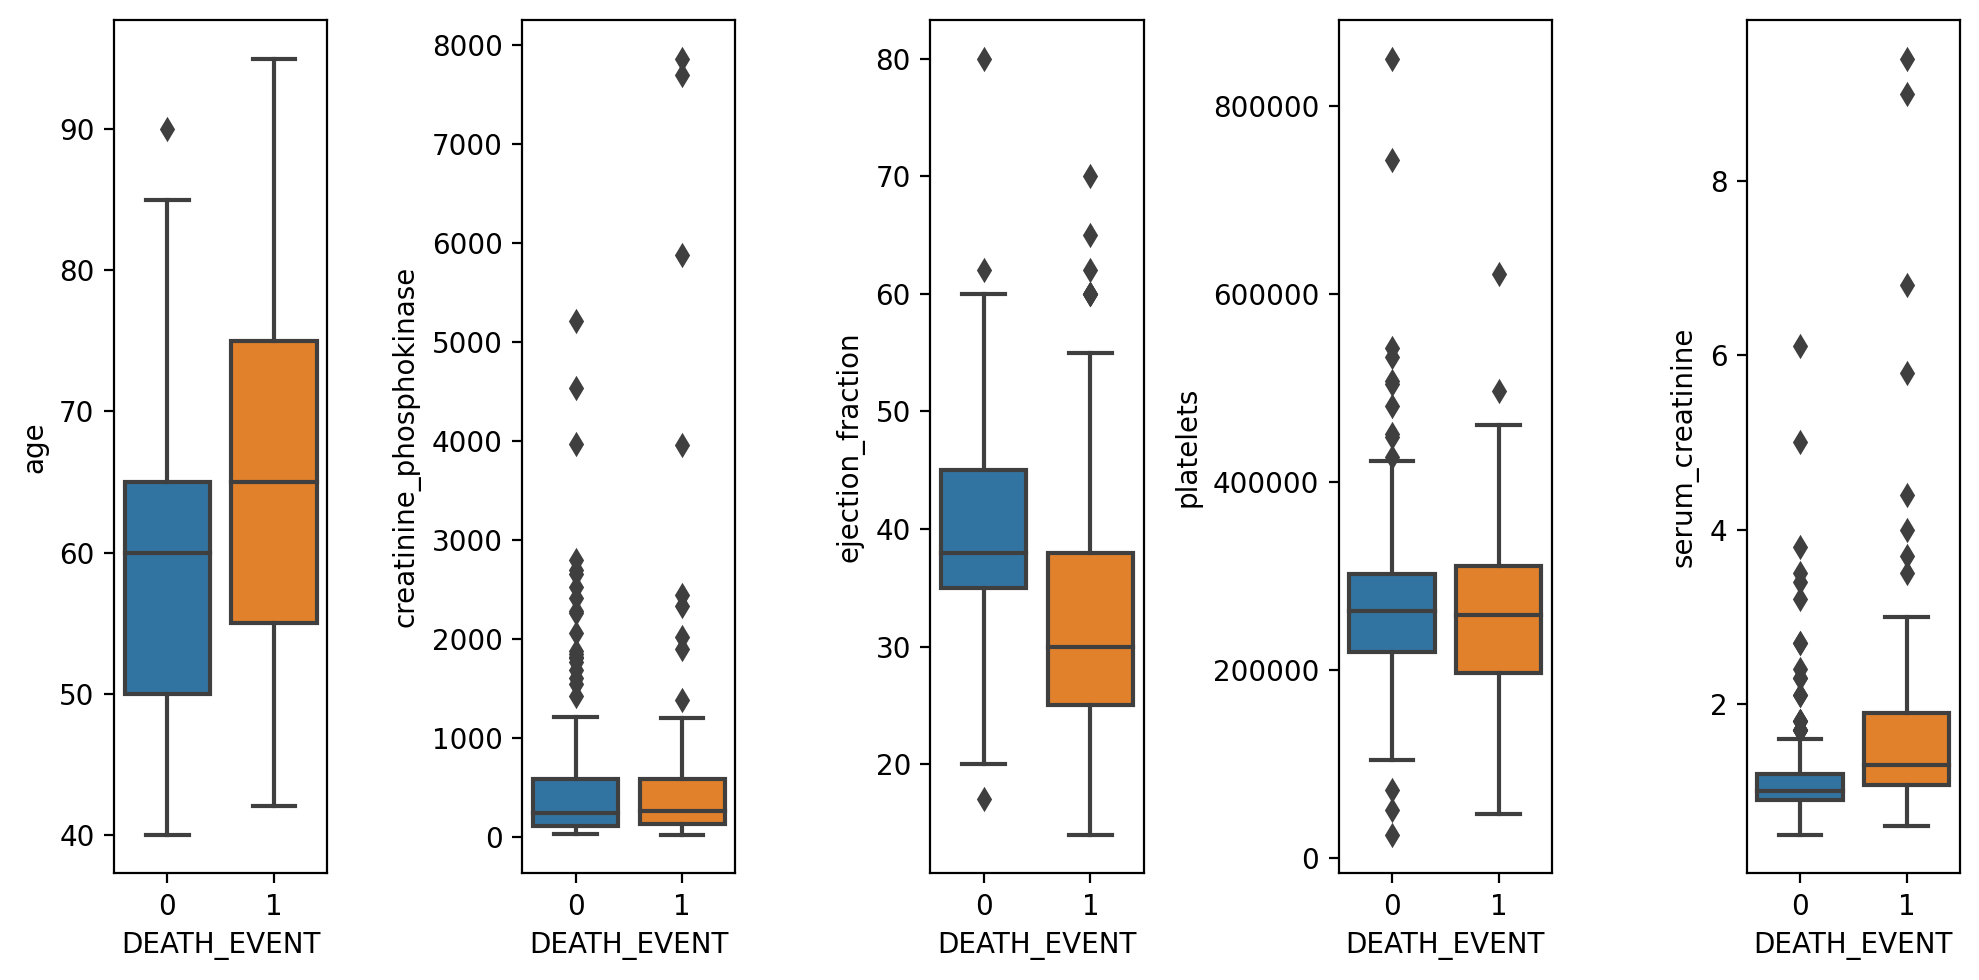

In [23]:
fig, ax = plt.subplots(1,5,figsize=(10,5), dpi=200) # 1행 5열

for axis, num_var in zip(ax, numeric_var) :
  sns.boxplot(y=num_var, data=df, x='DEATH_EVENT', ax=axis)

plt.tight_layout()

데이터 분리하기

In [24]:
# X(시험지), y(정답지) 분리하기
X = df.iloc[:,:-1]
y = df['DEATH_EVENT']

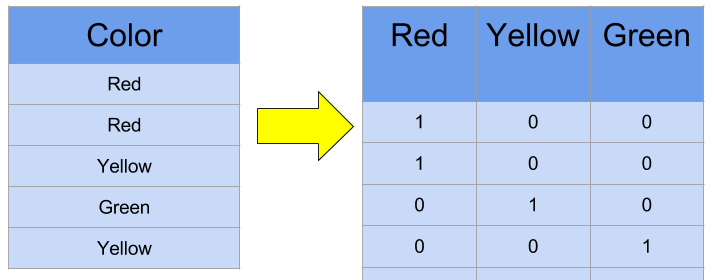

In [25]:
# 원-핫 인코딩 처리
# 컬럼 -> 원-핫 인코딩 처리
temp = pd.get_dummies(X[categorical_var], drop_first=True)

In [26]:
# 기존 데이터랑 합치기
X_modified = pd.concat([X,temp], axis=1)

In [27]:
# 기존 컬럼 삭제
X_modified.drop(categorical_var, axis=1, inplace=True)

In [28]:
X_modified.head()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time,anamia_1,diabetes_1,high_blood_pressure_1,sex_1,smoking_1
1,75,582,20,265000.00,1.9,130,4,0,0,1,1,0
2,55,7861,38,263358.03,1.1,136,6,0,0,0,1,0
3,65,146,20,162000.00,1.3,129,7,0,0,0,1,1
4,50,111,20,210000.00,1.9,137,7,1,0,0,1,0
5,65,160,20,327000.00,2.7,116,8,1,1,0,0,0


훈련용, 테스트 데이터 분리하기

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X_modified,y,
                                                    train_size=0.8, # test_size
                                                    random_state=7)

차원 축소 -> 스케일링

In [30]:
# 수치형 데이터 정규화
scaler = StandardScaler()
X_train[numeric_var] = scaler.fit_transform(X_train[numeric_var])
X_test[numeric_var] = scaler.fit_transform(X_test[numeric_var])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

In [31]:
X_train.head()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time,anamia_1,diabetes_1,high_blood_pressure_1,sex_1,smoking_1
189,-0.067326,-0.459498,0.137249,-0.653909,-0.399019,-0.099685,0.549299,1,1,1,0,0
95,-0.231518,-0.466878,-0.028420,0.611020,-0.664463,1.223914,-0.587733,0,1,1,0,0
127,-1.216669,-0.441575,-1.767942,0.048830,0.574279,-2.746884,-0.370547,0,1,1,0,0
243,-1.709245,-0.523810,-0.276923,-0.111796,-0.310537,-0.099685,1.060324,0,0,0,1,1
79,1.164114,-0.404674,-0.028420,0.169299,-0.752945,-1.202685,-0.702714,1,1,1,1,1


머신러닝 모델 구축 -1) LogisticRegression

In [32]:
log_reg = LogisticRegression().fit(X_train, y_train)

In [33]:
#정확도 확인
print('Train data Score: ' , log_reg.score(X_train,y_train))
print('Test data Score: ' , log_reg.score(X_test,y_test))

Train data Score:  0.8368200836820083
Test data Score:  0.8333333333333334


머신러닝 모델 구축 -2) Decision Tree

In [34]:
tree = DecisionTreeClassifier(max_depth=5,
                              min_samples_leaf=20,
                              min_samples_split=40).fit(X_train, y_train)

In [35]:
# 정확도 확인
print('Train data Score: ' , tree.score(X_train,y_train))
print('Test data Score: ' , tree.score(X_test,y_test))

Train data Score:  0.8493723849372385
Test data Score:  0.8833333333333333


머신러닝 모델 구축 -3) GradientBoostiongClassifier

In [36]:
boost = GradientBoostingClassifier(max_depth=3,
                                   learning_rate=0.05).fit(X_train, y_train)

In [37]:
# 정확도 확인
print('Train data Score: ' , boost.score(X_train,y_train))
print('Test data Score: ' , boost.score(X_test,y_test))

Train data Score:  0.9832635983263598
Test data Score:  0.8666666666666667


성능평가 -ROC 커브

In [38]:
def plot_auc_roc(model):
    probs = model.predict_proba(X_test)
    preds = probs[:,1]
    fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
    roc_auc = metrics.auc(fpr, tpr)

    # method I: plt
    import matplotlib.pyplot as plt
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

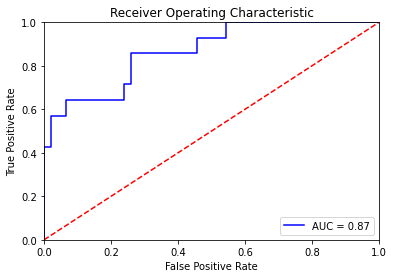

In [39]:
# Logistic Regression ROC
plot_auc_roc(log_reg)

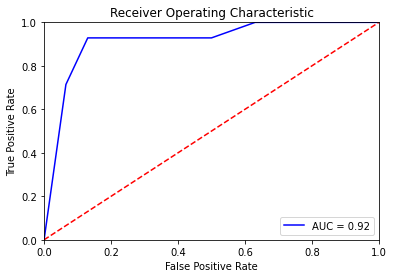

In [40]:
# Tree
plot_auc_roc(tree)

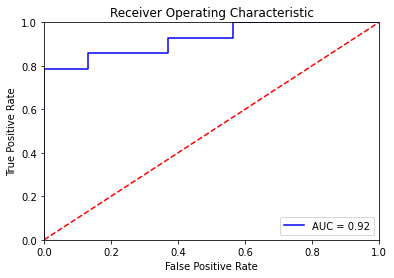

In [41]:
# GradientBoostingClassifie
plot_auc_roc(boost)

모델 성능 평가

In [42]:
# Logistic Regression 평가 지표
lg_y_hat = log_reg.predict(X_test)
lg_report = metrics.classification_report(y_test, lg_y_hat)
print('Logistic Regression 평가 지표')
print(lg_report)
print('accuracy', metrics.accuracy_score(y_test,lg_y_hat) )
print('precision', metrics.precision_score(y_test,lg_y_hat) )
print('recall', metrics.recall_score(y_test,lg_y_hat) )
print('f1', metrics.f1_score(y_test,lg_y_hat) )

Logistic Regression 평가 지표
              precision    recall  f1-score   support

           0       0.89      0.89      0.89        46
           1       0.64      0.64      0.64        14

    accuracy                           0.83        60
   macro avg       0.77      0.77      0.77        60
weighted avg       0.83      0.83      0.83        60

accuracy 0.8333333333333334
precision 0.6428571428571429
recall 0.6428571428571429
f1 0.6428571428571429


In [43]:
# tree 평가 지표
tree_y_hat = tree.predict(X_test)
tree_report = metrics.classification_report(y_test, tree_y_hat)
print('tree 평가 지표')
print(tree_report)
print('accuracy', metrics.accuracy_score(y_test,tree_y_hat) )
print('precision', metrics.precision_score(y_test,tree_y_hat) )
print('recall', metrics.recall_score(y_test,tree_y_hat) )
print('f1', metrics.f1_score(y_test,tree_y_hat) )

tree 평가 지표
              precision    recall  f1-score   support

           0       0.98      0.87      0.92        46
           1       0.68      0.93      0.79        14

    accuracy                           0.88        60
   macro avg       0.83      0.90      0.85        60
weighted avg       0.91      0.88      0.89        60

accuracy 0.8833333333333333
precision 0.6842105263157895
recall 0.9285714285714286
f1 0.7878787878787878


In [44]:
# boost 평가 지표
boost_y_hat = boost.predict(X_test)
boost_report = metrics.classification_report(y_test, boost_y_hat)
print('boost 평가 지표')
print(boost_report)
print('accuracy', metrics.accuracy_score(y_test,boost_y_hat) )
print('precision', metrics.precision_score(y_test,boost_y_hat) )
print('recall', metrics.recall_score(y_test,boost_y_hat) )
print('f1', metrics.f1_score(y_test,boost_y_hat) )

boost 평가 지표
              precision    recall  f1-score   support

           0       0.93      0.89      0.91        46
           1       0.69      0.79      0.73        14

    accuracy                           0.87        60
   macro avg       0.81      0.84      0.82        60
weighted avg       0.87      0.87      0.87        60

accuracy 0.8666666666666667
precision 0.6875
recall 0.7857142857142857
f1 0.7333333333333334


In [45]:
precision_list = []
recall_list = []

precision_list.append(metrics.precision_score(y_test, lg_y_hat))
recall_list.append(metrics.recall_score(y_test, lg_y_hat))

precision_list.append(metrics.precision_score(y_test, tree_y_hat))
recall_list.append(metrics.recall_score(y_test, tree_y_hat))

precision_list.append(metrics.precision_score(y_test, boost_y_hat))
recall_list.append(metrics.recall_score(y_test, boost_y_hat))

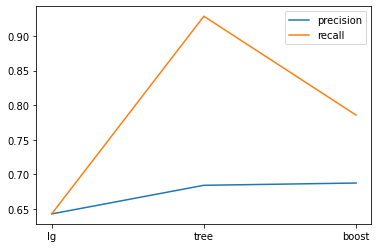

In [46]:
plt.plot(['lg', 'tree', 'boost'], precision_list, label='precision')
plt.plot(['lg', 'tree', 'boost'], recall_list, label='recall')
plt.legend()
plt.show()